Making graphs in Python, there are many different libraries for creating, visualizing, and analyzing graphs in Python. 'networkx', visualizes graphs using the matplotlib engine.

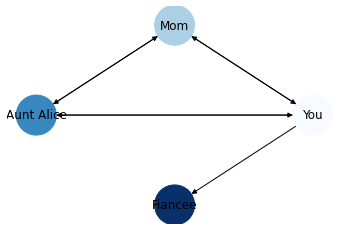

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import networkx as nx

#conda install networkx  

#Creating a directed graph
G = nx.DiGraph()

#Adding nodes.  We could have added them all in one list using .add_nodes_from()
G.add_node('You')
G.add_node('Mom')
G.add_node('Aunt Alice')
G.add_node('Fiancee')

#Adding edges.  You can also add them individually using .add_edge() 
G.add_edges_from([('You','Mom'),('You','Fiancee')])
G.add_edges_from([('Mom','You'),('Mom','Aunt Alice')])
G.add_edges_from([('Aunt Alice','Mom'),('Aunt Alice','You'), ('You', 'Aunt Alice')])


#Drawing the graph
nx.draw_networkx(G,
                 pos=nx.circular_layout(G), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()

In [2]:
# pip install decorator==4.3 Need to downgrade decorator

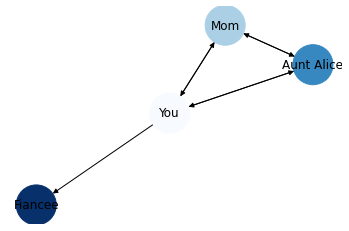

In [3]:
nx.draw_networkx(G,
                 pos=nx.spring_layout(G), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()

In [4]:
G.degree()

DiDegreeView({'You': 5, 'Mom': 4, 'Aunt Alice': 4, 'Fiancee': 1})

In [5]:
print("This graph has {} nodes and {} edges.".format(G.number_of_nodes(),G.number_of_edges()))

print('The "Aunt Alice" node has an in-degree of {} and an out-degree of {}.'.format(G.in_degree('Aunt Alice'),G.out_degree('Aunt Alice')))

print("The nodes are {}.".format(G.nodes()))

print("The edges are {}.".format(G.edges()))

print("The betweenness centrality scores are {}".format(nx.betweenness_centrality(G))) #Compute the shortest-path betweenness centrality for nodes. 

print('The node degrees are {}.'.format(G.degree())) #The node degree is the number of edges adjacent to that node.

This graph has 4 nodes and 7 edges.
The "Aunt Alice" node has an in-degree of 2 and an out-degree of 2.
The nodes are ['You', 'Mom', 'Aunt Alice', 'Fiancee'].
The edges are [('You', 'Mom'), ('You', 'Fiancee'), ('You', 'Aunt Alice'), ('Mom', 'You'), ('Mom', 'Aunt Alice'), ('Aunt Alice', 'Mom'), ('Aunt Alice', 'You')].
The betweenness centrality scores are {'You': 0.3333333333333333, 'Mom': 0.0, 'Aunt Alice': 0.0, 'Fiancee': 0.0}
The node degrees are [('You', 5), ('Mom', 4), ('Aunt Alice', 4), ('Fiancee', 1)].


**Hubs** - You are the node he hub of the network, with a high degree (4) and the highest betweenness centrality score (.33). That node touches many other nodes, and is part of the shortest path between many nodes. If we wanted to disseminate information throughout the network, it would be a good idea to start by telling "You."

**Paths**

We can compute the lengths of all the simple paths between nodes. The return is a dictionary of pairwise node connectivity, giving the starting node and a list of all ending nodes with the length of the simple path connecting each starting/ending pair.

Similarly, we can get a list of all the shortest paths. The return is a dictionary of dictionaries formatted such that source : { target1=[list of nodes in path], target2=[list of nodes in path]}.

In [6]:
print("Simple paths:",nx.all_pairs_node_connectivity(G),'\n')

path = dict(nx.all_pairs_shortest_path(G))

print("Shortest paths:", path)

Simple paths: {'You': {'Mom': 2, 'Aunt Alice': 2, 'Fiancee': 1}, 'Mom': {'You': 2, 'Aunt Alice': 2, 'Fiancee': 1}, 'Aunt Alice': {'You': 2, 'Mom': 2, 'Fiancee': 1}, 'Fiancee': {'You': 0, 'Mom': 0, 'Aunt Alice': 0}} 

Shortest paths: {'You': {'You': ['You'], 'Mom': ['You', 'Mom'], 'Fiancee': ['You', 'Fiancee'], 'Aunt Alice': ['You', 'Aunt Alice']}, 'Mom': {'Mom': ['Mom'], 'You': ['Mom', 'You'], 'Aunt Alice': ['Mom', 'Aunt Alice'], 'Fiancee': ['Mom', 'You', 'Fiancee']}, 'Aunt Alice': {'Aunt Alice': ['Aunt Alice'], 'Mom': ['Aunt Alice', 'Mom'], 'You': ['Aunt Alice', 'You'], 'Fiancee': ['Aunt Alice', 'You', 'Fiancee']}, 'Fiancee': {'Fiancee': ['Fiancee']}}


In [7]:
nx.all_pairs_shortest_path_length(G)

<generator object all_pairs_shortest_path_length at 0x7f9275ecc6d0>